# QCoDeS Example with Stanford SR830

In [1]:
# IMPORTS

#%matplotlib notebook
import qcodes as qc
import os
import numpy as np
from time import sleep
from qcodes.instrument_drivers.stanford_research.SR830 import SR830
from SR830ext.SR830_ext import SR830_ext
from qcodes.measure import Measure
from qcodes.instrument.base import Instrument
from qcodes.utils.validators import Numbers, Arrays
from qcodes.utils.dataset import doNd




from qcodes import initialise_or_create_database_at, load_or_create_experiment, load_by_id
from qcodes.dataset.plotting import plot_dataset
#import matplotlib as mp
tutorial_db_path = os.path.join(os.getcwd(), 'tutorial_doND.db')
initialise_or_create_database_at(tutorial_db_path)
load_or_create_experiment(experiment_name='tutorial_exp', sample_name="no sample")

tutorial_exp#no sample#1@C:\Users\Farzad\Documents\Rasmus\tutorial_doND.db
--------------------------------------------------------------------------
1-results-1-lockin_setpoints,lockin_trace-1
2-results-2-lockin_setpoints,lockin_trace-1
3-results-3-lockin_setpoints,lockin_trace-1
4-results-4-gen2_v_now,lockin_setpoints,lockin_trace-20
5-results-5-lockin_setpoints,lockin_trace-0
6-results-6-lockin_setpoints,lockin_trace-0
7-results-7-lockin_setpoints,lockin_trace-1
8-results-8-gen2_v_now,lockin_setpoints,lockin_trace-20

In [2]:
class DummyGenerator(Instrument):

    def __init__(self, name, **kwargs):

        super().__init__(name, **kwargs)

        self.add_parameter('v_start',
                           initial_value=0,
                           unit='V',
                           label='v start',
                           vals=Numbers(0,1e3),
                           get_cmd=None,
                           set_cmd=None)

        self.add_parameter('v_stop',
                           initial_value=1,
                           unit='V',
                           label='v stop',
                           vals=Numbers(1,1e3),
                           get_cmd=None,
                           set_cmd=None)
        
        self.add_parameter('v_now',
                           initial_value=0,
                           unit='V',
                           label='v_now',
                           vals=Numbers(self.v_start(),self.v_stop()),
                           get_cmd=None,
                           set_cmd=None)

In [3]:
gen = DummyGenerator('gen')
gen2 = DummyGenerator('gen2')

In [5]:
# CONNECT TO INSTRUMENT

sr = SR830_ext('lockin', 'GPIB0::1::INSTR')

Connected to: Stanford_Research_Systems SR830 (serial:s/n40974, firmware:ver1.07) in 0.22s


In [6]:
sr.ch1_display('X')
sr.ch1_ratio('none')
sr.buffer_SR('Trigger')
sr.buffer_trig_mode.set('ON')
sr.set_sweep_parameters(gen.v_now, 0,0.5, label="Voltage")

## List of parameters

In [7]:
sr.wait_time = 0.1
sr.print_readable_snapshot(update=True)

lockin:
	parameter       value
--------------------------------------------------------------------------------
IDN              :	{'vendor': 'Stanford_Research_Systems', 'model': 'SR830', ...
P                :	0 (deg)
R                :	0 (V)
R_offset         :	(0.0, 0) 
X                :	0 (V)
X_offset         :	(0.0, 0) 
Y                :	0 (V)
Y_offset         :	(0.0, 0) 
amplitude        :	0.94 (V)
aux_in1          :	0.0023333 (V)
aux_in2          :	0.0013333 (V)
aux_in3          :	0.0026667 (V)
aux_in4          :	0.0063333 (V)
aux_out1         :	0 (V)
aux_out2         :	0 (V)
aux_out3         :	0 (V)
aux_out4         :	0 (V)
buffer_SR        :	Trigger (Hz)
buffer_acq_mode  :	single shot 
buffer_npts      :	10 
buffer_trig_mode :	ON 
ch1_databuffer   :	Not available (V)
ch1_display      :	X 
ch1_ratio        :	none 
ch2_databuffer   :	Not available (V)
ch2_display      :	Phase 
ch2_ratio        :	none 
ext_trigger      :	TTL rising 
filter_slope     :	24 (dB/oct)
frequency     

Starting experimental run with id: 9. 


(results #9@C:\Users\Farzad\Documents\Rasmus\tutorial_doND.db
 ------------------------------------------------------------
 lockin_setpoints - array
 lockin_trace - array,
 [<AxesSubplot:title={'center':'Run #9, Experiment tutorial_exp (no sample)'}, xlabel='Voltage (mV)', ylabel='Signal (μV)'>],
 [None])

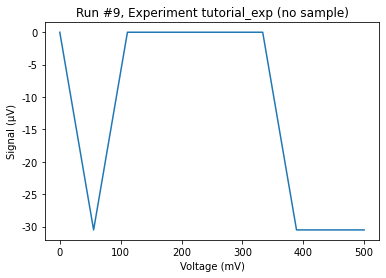

In [8]:
doNd.do0d(sr.trace,do_plot=True)

Starting experimental run with id: 10. 


(results #10@C:\Users\Farzad\Documents\Rasmus\tutorial_doND.db
 -------------------------------------------------------------
 gen2_v_now - numeric
 lockin_setpoints - array
 lockin_trace - array,
 [<AxesSubplot:title={'center':'Run #10, Experiment tutorial_exp (no sample)'}, xlabel='v_now (V)', ylabel='Voltage (mV)'>],
 [<matplotlib.colorbar.Colorbar at 0x196bca90108>])

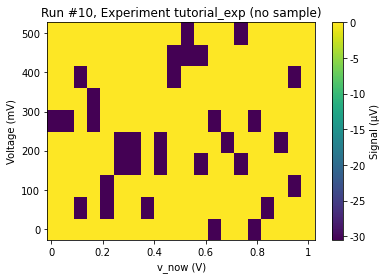

In [9]:
doNd.do1d(gen2.v_now, 0.01,1.0,20,1,sr.trace,do_plot=True)